# Perceptron algorithm

Perceptron algorithm is a linear classifier. Therefore, make sure your dataset is linearly separable if you want it to converge (more info at https://en.wikipedia.org/wiki/Perceptron).

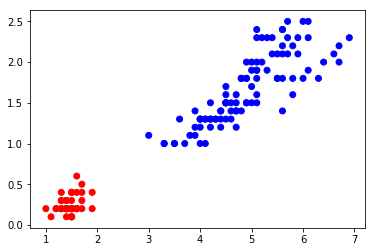

In [387]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas
import random

filename = 'data/iris2d.csv' #dataset

data = pandas.read_csv(filename, header=0) # Read dataset from a .csv file
X,y = np.split(data, [-1], axis=1) #X is out dataset and y is a vector of classes

X.insert(0, 'x0', np.ones((X.shape[0], 1))) # Insert a column of ones for bias w0

y = y.values.flatten()
X = X.values

assert set([-1,1]) == set(np.unique(y)), "This is a binary classifier. Make sure, y contains -1 or 1."

#Preparing for plot dataset (red: 1, blue: -1)
assert X.shape[1]==3, "Make sure X is bidimensional if you want to plot your data."
color = ['red' if l == 1 else 'blue' for l in y]

#plot data
plt.scatter(X[:,1], X[:,2], color=color)
plt.show()

In [388]:
def calculate_outputs(X, w):
    y_pred = np.array([w.dot(x).item() for x in X]) # Calculate the actual output
    
    #Normalize output such that y contains only -1 or 1.
    for i in range(y_pred.shape[0]):
        if y_pred[i] >= 0:
            y_pred[i] = 1
        else:
            y_pred[i] = -1
    
    return y_pred

In [389]:
def update_weights(X, y, w, id_candidate):
    return w + y[id_candidate]*X[id_candidate]

In [390]:
def perceptron(X, y, max_iterations = 100, initialization='random'):
    if initialization == 'random':
        w = np.random.normal(size=X.shape[1])
    else:
        w = np.zeros(X.shape[1]) # weight vector, may be initialized as a random vector of small values or as a zero vector

    for i in range(max_iterations):
        #Calculate actual values of y
        y_pred = calculate_outputs(X, w)

        #Randomly select an example incorrectely classified in y_pred
        candidates = y[y!=y_pred]
        if candidates.shape[0] == 0: break #stop loop if there is no incorrectely classified examples remaining
        id_candidate = random.choice(range(candidates.shape[0]))

        w = update_weights(X, y, w, id_candidate) #Update weight vector

    return w

In [391]:
w = perceptron(X, y, 100) # Execute Perceptron algorithm

print("Total of examples classified correctly: ", sum(y == calculate_outputs(X,w)))

Total of examples classified correctly:  150


In [392]:
def draw_decision_boundary(X, y, w):
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
    Z = calculate_outputs(np.c_[np.ones(len(xx.ravel())), xx.ravel(), yy.ravel()], w).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.6)
    plt.scatter(X[:, 1], X[:, 2], c=color, alpha=0.8)
    plt.show()

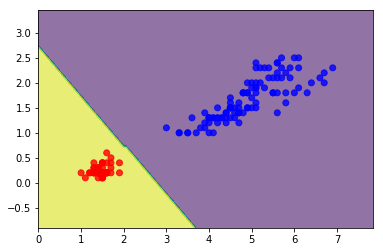

In [393]:
assert X.shape[1]==3, "Make sure X is bidimensional if you want to plot your data."
draw_decision_boundary(X, y, w)